## Triage Data Analysis 
##### A Classification of patients into severity categories using machine learning



## Table of contents

1. [Introduction ](#1.-Introduction)  
  
  
2. [Data Reformatting and Cleaning](#2.-Data-Reformatting-and-Cleaning)   
       
       
3. [Independent Variable EDA](#3.-Independent-Variable-EDA) 


4. [EDA between different variables](#4.-EDA-between-different-variables) 


5. [Text Column EDA](#5.-Text-Column-EDA)


6. [Feature Selection and Transformation](#6.-Feature-Selection-and-Transformation)


7. [Baseline Model](#7.-Baseline-Model)


8. [Model Evaluation Framework](#8.-Model-Evaluation-Framework)

9. [Hyperparameter optimization + Scaling](#9.-Hyperparameter-optimization-+-Scaling)

10. [Predicting on new data](#10.-Predicting-on-new-data)

## 1. Introduction

The overcrowding of a hospital’s emergency room has always been a major concern in healthcare systems all over
the world. In Ontario, on average, an ER sees 5 million visits per year with an average wait time of 5 hours. The ER
constantly see a high volume of patients seeking healthcare including patients who arrive at the ER for nonemergency
reasons. Once patients arrive at the ER, a preliminary assessment of the patient is conducted to
determine the urgency of their medical need, a process known as triage. Once patients are triaged, nonemergency
patients are discharged or redirected to facilities that handle non-emergency cases. The triage nurses
must assess the large volume of patients that arrive daily and allocate time to triaging non-emergency patients
which diverts resources from emergency cases with healthcare resources not being properly allocated to the
individuals who need it the most. The inefficiency in resource allocation results in patients receiving delayed care
and places a huge strain on hospitals. The objective of this project is to develop a tool that assists healthcare personnel with triaging incoming ER patients to reduce
the time spent on triaging and better equip healthcare professionals in making decisions. The tool will recommend
the level of care the patient requires based on the patients’ vital signs and symptoms within seconds. The tool will
be developed using an algorithm that uses the patients’ vitals and symptoms to classify the patient in 5 different
categories and also predict if the patient will require admission into the ER. A dataset that will be used to develop the triage tool contains ER data of over 1200 patients from two emergency
departments between October 2016 and September 2017. The dataset is sourced from Kaggle and includes the
patients’ age, sex, symptoms, vitals, complaint and the urgency level that was assigned by the triage nurse. The independent variable will the be the patients **vitals/symptoms** and the dependent variable is the **KTAS expert score**

## 2. Data Reformatting and Cleaning


In [2046]:
#Import of libraries to be used for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats
warnings.filterwarnings('ignore')

We will first load our dataset and take  a quick glimpse at the dataset to see what our columns look like at a high level

In [2047]:
#loading dataset and displaying first 3 columns
df_raw = pd.read_csv('datasetcap.csv',sep=';',encoding='latin-1')
df_raw.head(3)

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,...,36.6,100,2,Corneal abrasion,1,4,2,86,"5,00",1
1,1,1,56,12,3,2,right forearm burn,1,1,2,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,"3,95",1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,...,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,"1,00",1


In [2048]:
#Checking shape
df_raw.shape

(1267, 24)

Tha dataset contains 24 rows of data containing a mix of text, numerical and categorical columns. Lets take a look at the datatypes of each of the columns. We will also check the number of unique entries in each row to get an idea of the variety of the contents of each column

In [2049]:
#Checking number of unique values
df_raw.nunique()

Group                         2
Sex                           2
Age                          81
Patients number per hour     16
Arrival mode                  7
Injury                        2
Chief_complain              417
Mental                        4
Pain                          2
NRS_pain                     11
SBP                         127
DBP                          83
HR                           94
RR                           11
BT                           46
Saturation                   22
KTAS_RN                       5
Diagnosis in ED             583
Disposition                   7
KTAS_expert                   5
Error_group                  10
Length of stay_min          716
KTAS duration_min           392
mistriage                     3
dtype: int64

Some of our columns have  a variety of data within the column while some columns are binary i.e either yes or no

In [2050]:
#Checking null values and datatype of each column
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

We can see that we have some numeric and categorical columns.  Some of our numeric columns such as saturation and Systolic blood pressure (SBP) are objects instead of numbers so we need to convert them to numeric as they are numeric features

In [2051]:
#Converting numeric columns from object to numeric
df_raw['Saturation'] = df_raw['Saturation'].apply(pd.to_numeric, errors='coerce')
df_raw['HR'] = df_raw['HR'].apply(pd.to_numeric, errors='coerce')
df_raw['RR'] = df_raw['RR'].apply(pd.to_numeric, errors='coerce')
df_raw['BT'] = df_raw['BT'].apply(pd.to_numeric, errors='coerce')
df_raw['NRS_pain'] = df_raw['NRS_pain'].apply(pd.to_numeric, errors='coerce')
df_raw['SBP'] = df_raw['SBP'].apply(pd.to_numeric, errors='coerce')
df_raw['DBP'] = df_raw['DBP'].apply(pd.to_numeric, errors='coerce')




Moreover the dataset contains several columns with entries that are numerical but represent string. For example the 'Mental' Column has numeric entries that stand for status i.e 1 and 2 stand for Alert and unconcious etc. We will convert these to text for the purposes of exploratory data analysis for ease of reading and interpretation

In [2052]:
#Replacing number representation of categorical column to text
df_raw['mistriage'].replace({0: 'Correct', 1: 'Over triage', 2: 'Under triage'}, inplace=True)
df_raw['Group'].replace({1: 'Local ED' , 2: 'Regional ED'}, inplace=True)
df_raw['Injury'].replace({1: 'non-injured' , 2: 'injury'}, inplace=True)
df_raw['Sex'].replace({1: 'Female' , 2: 'Male'}, inplace=True)
df_raw['Pain'].replace({1: 'pain' , 0: 'non-pain'}, inplace=True)
df_raw['NRS_pain'].replace({ '#BO�!': 0}, inplace=True) 
df_raw['Mental'].replace({1: 'Alert',2: 'Verbal Resppne',3: 'Pain Response',4: 'unconcious'}, inplace=True)
df_raw['Disposition'].replace({1: 'Discharge',2: 'Ward admission', 3: 'ICU admission', 4: 'AMA discharge', 5: 'Transfer',6: 'Death' , 7: 'OP fom ED'},inplace=True)
df_raw['Arrival mode'].replace({1: 'Walking',2: '119 use',3: 'Private car',4: 'Private ambulance',5: 'Public transporation (Police ets)',6: 'Wheelchair', 7: 'Others'}, inplace=True)
df_raw.head(3)

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,Regional ED,Male,71,3,Private car,injury,right ocular pain,Alert,pain,2.0,...,36.6,100.0,2,Corneal abrasion,Discharge,4,2,86,"5,00",Over triage
1,Local ED,Female,56,12,Private car,injury,right forearm burn,Alert,pain,2.0,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",Discharge,5,4,64,"3,95",Over triage
2,Regional ED,Female,68,8,119 use,injury,"arm pain, Lt",Alert,pain,2.0,...,36.6,98.0,4,"Fracture of surgical neck of humerus, closed",Ward admission,5,4,862,"1,00",Over triage


Our dataset is now much easier to interpret and explore since our categorical columns have text instead of numbers that require interpretation

Taking a look at the datatypes of our transformed dataset

In [2053]:
#Checking datatypes
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Group                     1267 non-null   object 
 1   Sex                       1267 non-null   object 
 2   Age                       1267 non-null   int64  
 3   Patients number per hour  1267 non-null   int64  
 4   Arrival mode              1267 non-null   object 
 5   Injury                    1267 non-null   object 
 6   Chief_complain            1267 non-null   object 
 7   Mental                    1267 non-null   object 
 8   Pain                      1267 non-null   object 
 9   NRS_pain                  711 non-null    float64
 10  SBP                       1242 non-null   float64
 11  DBP                       1238 non-null   float64
 12  HR                        1247 non-null   float64
 13  RR                        1245 non-null   float64
 14  BT      

We can see that now that we converted the numeric columns to numeric, the null data has increased for some of the columns so we will need to deal with the null data

### Identifying and dealing with duplicate/missing values

In [2054]:
#Checking to see if any rows are duplicated
df_raw.duplicated().sum()

0

In [2055]:
#Checking to see how many null columns
df_raw.isna().sum(axis=0)/df_raw.shape[0]*100

Group                        0.000000
Sex                          0.000000
Age                          0.000000
Patients number per hour     0.000000
Arrival mode                 0.000000
Injury                       0.000000
Chief_complain               0.000000
Mental                       0.000000
Pain                         0.000000
NRS_pain                    43.883189
SBP                          1.973165
DBP                          2.288871
HR                           1.578532
RR                           1.736385
BT                           1.420679
Saturation                  55.011839
KTAS_RN                      0.000000
Diagnosis in ED              0.157853
Disposition                  0.000000
KTAS_expert                  0.000000
Error_group                  0.000000
Length of stay_min           0.000000
KTAS duration_min            0.000000
mistriage                    0.000000
dtype: float64

### a)Dealing with NRS_pain missing values

Lets first take a look at the all the null rows for NRS_pain and see if there is is relationship with the other columns

In [2056]:
#Isolating only NRS_pain null rows
null_NRS_Pain_dataset=df_raw[df_raw['NRS_pain'].isnull()]
null_NRS_Pain_dataset.head(3)

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
29,Local ED,Male,49,3,119 use,non-injured,Seizure Like Activity,Alert,non-pain,NaN,...,37.4,NaN,2,Seizure,Discharge,3,5,304,"5,30",Over triage
30,Local ED,Male,32,10,Private car,non-injured,post seizure,Alert,non-pain,NaN,...,36.7,NaN,2,Fracture of mandible open,Ward admission,3,1,321,"7,42",Over triage
31,Local ED,Female,65,12,Wheelchair,non-injured,vomiting,Alert,non-pain,NaN,...,36.1,NaN,3,Vomiting,Discharge,4,1,183,"12,48",Over triage


Looks like the people who have null values in the NRS_pain column have no pain. Lets find out how many of the null rows are also non-pain

In [2057]:
#Checking how many null rows have no pain
null_NRS_Pain_dataset['Pain'].value_counts()

non-pain    553
pain          3
Name: Pain, dtype: int64

Almost all the people with the NRS pain column not filled have no pain. This could be because if you have no pain, then there is no need to fill out the NRS_pain column as there is no need to scale the pain. Lets see if everyone with no pain is given a 0 in the NRS_pain. If thats the case, we can just fill the null columns with 0 since almost all of then are no pain patients

In [2058]:
#Checking the NRS_Pain assigned to non-pain patients
non_pain_data=df_raw[df_raw['Pain']=='non-pain']
non_pain_data['NRS_pain'].value_counts()

Series([], Name: NRS_pain, dtype: int64)

People with no pain have a NRS_pain score of 0 and almost all the null value rows in the NRS_column are also non-pain patients. Patients with no pain are not given an NRS_score therefore a null value is recorded in these columns. We will replace the null values with an NRS_score of 0 to reflect the pain level accurately

In [2059]:
#Replacing null columns with 0
df_raw['NRS_pain'].fillna(0, inplace=True)

### b)Dealing with Saturation missing values

We will start with checking the statistics summary of the saturation column followed by the distribution

In [2060]:
#Checking statistics summary
df_raw["Saturation"].describe()

count    570.000000
mean      97.024561
std        4.350556
min       20.000000
25%       97.000000
50%       98.000000
75%       98.000000
max      100.000000
Name: Saturation, dtype: float64

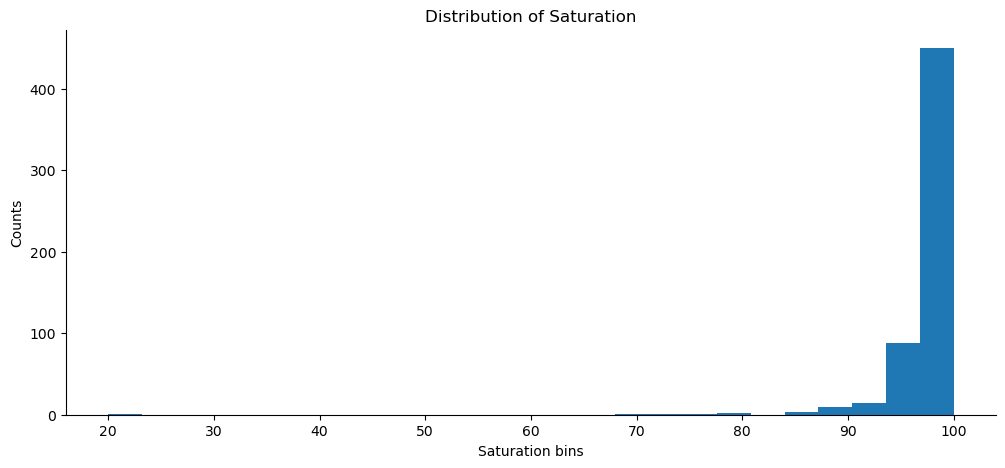

In [2061]:
#Plotting distribution of saturation
plt.figure(figsize=(12, 5))

plt.hist(df_raw["Saturation"], bins=25)

plt.title("Distribution of Saturation")
plt.ylabel('Counts')
plt.xlabel("Saturation bins")
sns.despine()

plt.show()

Since the majority of saturation are between 90-100 with a low standard deviation. The missing valuies will be replaced with mean

In [2062]:
#Replacing missing values with mean
mean_saturation=df_raw["Saturation"].mean()
df_raw["Saturation"]=df_raw["Saturation"].fillna(mean_saturation)

### c) Dealing with SBP,DBP,HR,BT,RR,Diagnosis in ED

These columns have very a very small amount of missing values (~2%). We will fill them with median and mode for the categorical column

In [2063]:
#Replacing null values with median
df_raw["SBP"]=df_raw["SBP"].fillna(df_raw["SBP"].median())
df_raw["DBP"]=df_raw["DBP"].fillna(df_raw["DBP"].median())
df_raw["HR"]=df_raw["HR"].fillna(df_raw["HR"].median())
df_raw["RR"]=df_raw["RR"].fillna(df_raw["RR"].median())
df_raw["BT"]=df_raw["BT"].fillna(df_raw["BT"].median())


The diagnosis in ED is a categorical column so we will replace the 2 missing rows with the most commonly occuring datapoint

In [2064]:
#Finding the most common diagnosis
df_raw["Diagnosis in ED"].mode()

0    Acute gastroenteritis
dtype: object

Since Acute gastroenteritis is the mode we will replace the null values with this entry

In [2065]:
#Replacing null with mode
df_raw["Diagnosis in ED"]=df_raw["Diagnosis in ED"].fillna('Acute gastroenteritis')

In [2066]:
#Checking null values again
df_raw.isna().sum(axis=0)

Group                       0
Sex                         0
Age                         0
Patients number per hour    0
Arrival mode                0
Injury                      0
Chief_complain              0
Mental                      0
Pain                        0
NRS_pain                    0
SBP                         0
DBP                         0
HR                          0
RR                          0
BT                          0
Saturation                  0
KTAS_RN                     0
Diagnosis in ED             0
Disposition                 0
KTAS_expert                 0
Error_group                 0
Length of stay_min          0
KTAS duration_min           0
mistriage                   0
dtype: int64

We have now filled all the null values so our dataset is ready for exploratory analysis

## 3. Independent Variable EDA

### a) KTAS score

First we will take a look at the distribution of the dependent variable

Text(0.5, 1.0, 'Breakdown of KTAS scores')

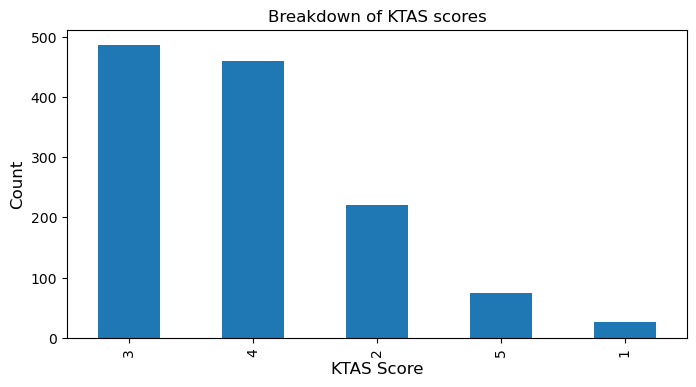

In [2067]:
#Finding the value counts of the KTAS expert column and then plotting a bar graph
df_raw['KTAS_expert'].value_counts().plot(kind='bar',figsize=[8,4])
plt.xlabel('KTAS Score', size=12)

plt.ylabel('Count', size=12)
plt.title('Breakdown of KTAS scores')



The dataset is not balanced between the 5 classes .Class 1 and 5 have very few data and class 3 and 4 are where most of the data points are concentrated. Therefore we will group classes 1,2 and 3 as 'emergency (1)' anf class 4 and 5 as 'non emergency(0)'

In [2068]:
#grouping the classes together 
df_raw["KTAS_expert"] = np.where(df_raw["KTAS_expert"] < 4, 1, 0)

Text(0.5, 1.0, 'Updated Breakdown of KTAS scores')

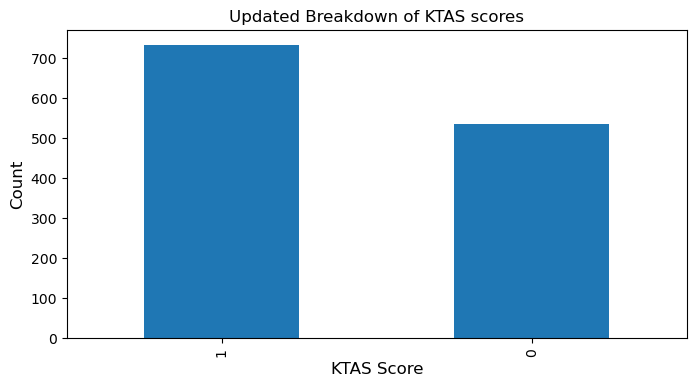

In [2069]:
df_raw['KTAS_expert'].value_counts().plot(kind='bar',figsize=[8,4])
plt.xlabel('KTAS Score', size=12)

plt.ylabel('Count', size=12)
plt.title('Updated Breakdown of KTAS scores')

The classes of the dependent variable are now a bit more balanced which will make the model less likeley to be biased

### b) Disposition ,Gender and Injury
We will plot a bar graph to see how the different categories are broken down

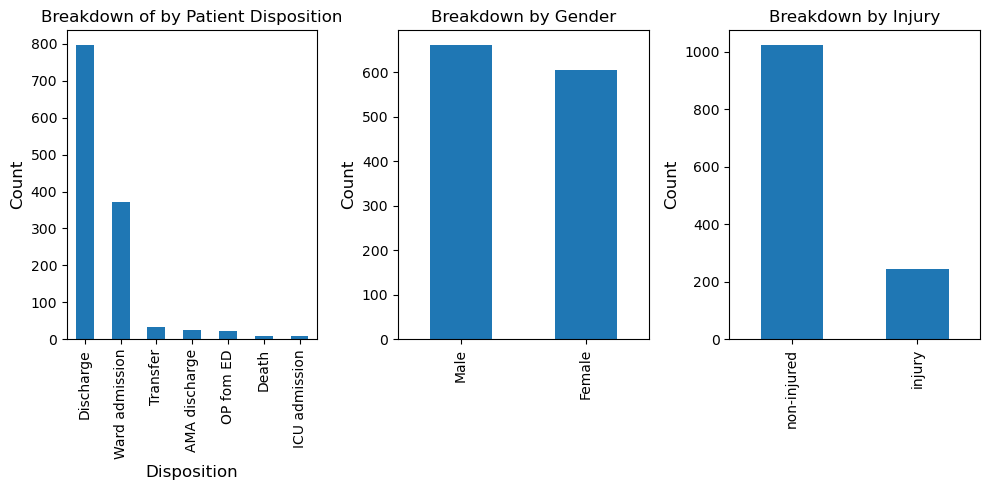

In [2070]:
#Creating a subplot of the three columns 
plt.subplots(1, 3) 

plt.subplot(1, 3, 1)  
df_raw['Disposition'].value_counts().plot(kind='bar',figsize=[10,5])
plt.xlabel('Disposition', size=12)

plt.ylabel('Count', size=12)
plt.title('Breakdown of by Patient Disposition')

plt.subplot(1, 3, 2)
df_raw['Sex'].value_counts().plot(kind='bar')
plt.ylabel('Count',size=12)
plt.title('Breakdown by Gender')

plt.subplot(1, 3, 3)
df_raw['Injury'].value_counts().plot(kind='bar')
plt.ylabel('Count',size=12)
plt.title('Breakdown by Injury')

plt.tight_layout()

plt.show()

- The majority of the patients end up being discharged. The second most common disposition is admission 

- More of the patients who come to the ER are Male with about 55% of the ER visitors being male

- The large majority of patients who come to the ER do no have an injury. Injured patients make up 15% of the ER patients

### c) Mental State,Pain and Patient number
We will plot a histogram and bargraph to see how the different categories are broken down

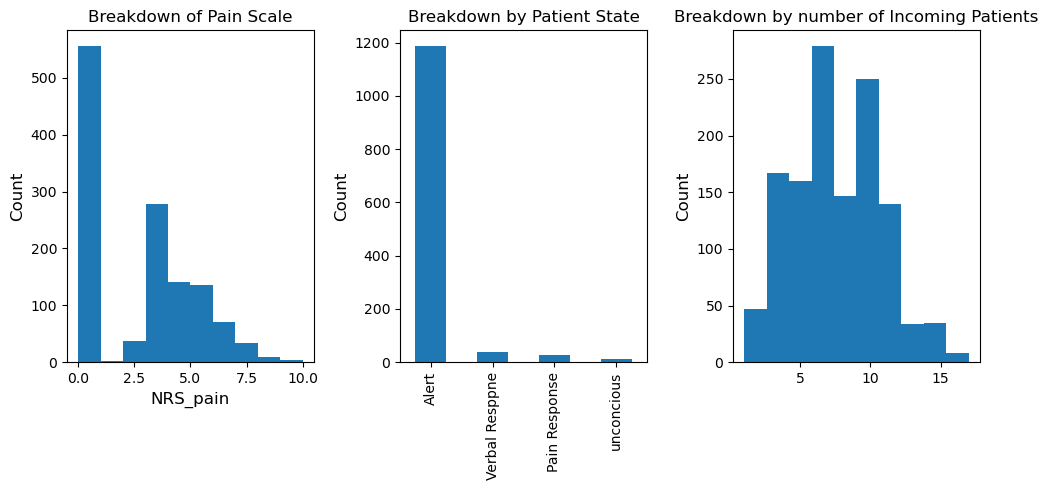

In [2071]:
#Creating a subplot of the three columns 
plt.subplots(1, 3) 

plt.subplot(1, 3, 1)  
df_raw['NRS_pain'].plot(kind='hist',figsize=[10,5])
plt.xlabel('NRS_pain', size=12)
plt.ylabel('Count', size=12)
plt.title('Breakdown of Pain Scale')

plt.subplot(1, 3, 2)
df_raw['Mental'].value_counts().plot(kind='bar')
plt.ylabel('Count',size=12)
plt.title('Breakdown by Patient State')

plt.subplot(1, 3, 3)
df_raw['Patients number per hour'].plot(kind='hist')
plt.ylabel('Count',size=12)
plt.title('Breakdown by number of Incoming Patients')

plt.tight_layout() 

plt.show()

- About half the ER patients present with no pain and those with pain usually report a pain of about 2.5-5 in the 1-10 pain scale. The histogram slightly resembles a normal distribution

- Most of the patients come to the ER Alert 

- The incoming patients number histogram slighly resembles a bimodal distribution with two peaks. 

### d) SBP and DBP
We will plot a histogram see how the different features are broken down

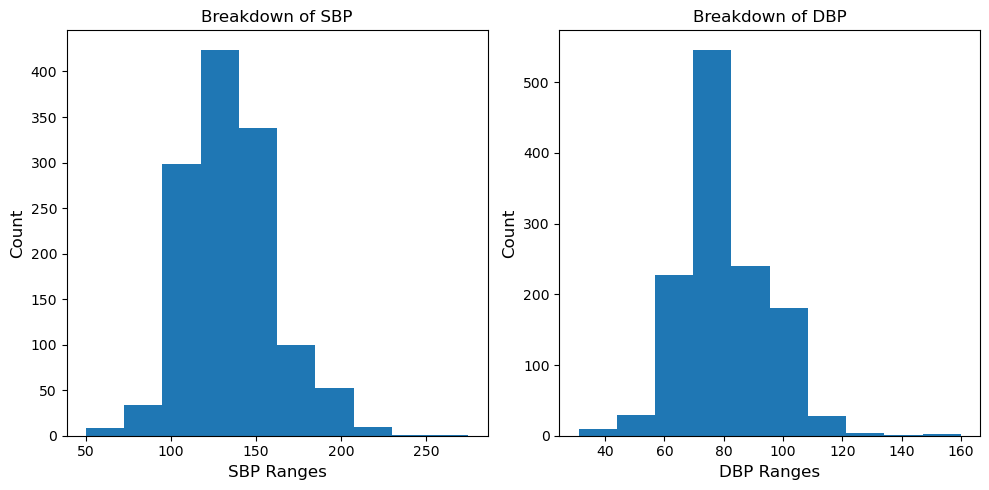

In [2072]:
plt.subplots(1, 2) 

plt.subplot(1, 2, 1)  
df_raw['SBP'].plot(kind='hist',figsize=[10,5])
plt.xlabel('SBP Ranges', size=12)
plt.ylabel('Count', size=12)
plt.title('Breakdown of SBP')

plt.subplot(1, 2, 2)
df_raw['DBP'].plot(kind='hist',figsize=[10,5])
plt.ylabel('Count',size=12)
plt.xlabel('DBP Ranges', size=12)
plt.title('Breakdown of DBP')

plt.tight_layout() 

plt.show()

- The SBP and DBP columns show a normal distribution with very few outliers. For SBP the majority of the datapoints lie between 100 to 160 and for DBP the usual range is between 60-90

### e) Heart Rate and Respiratory Rate
We will plot a histogram see how the different features are broken down

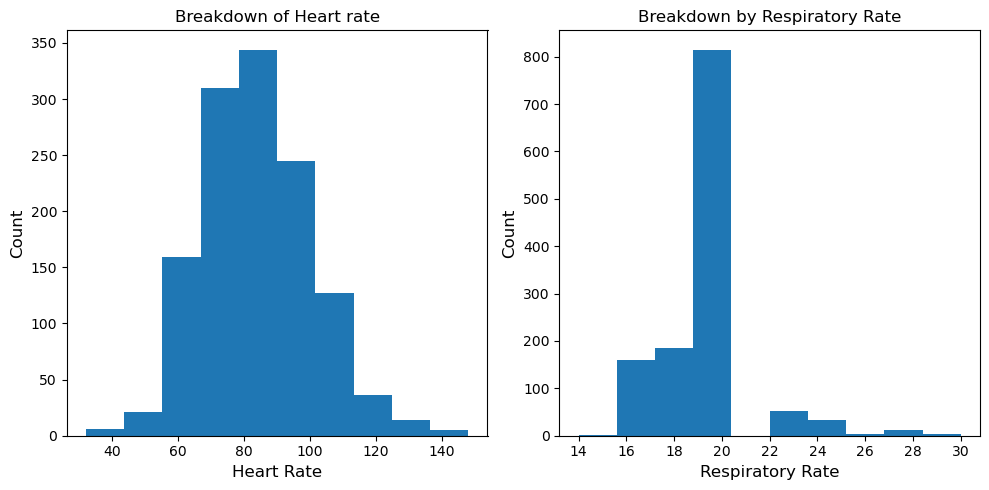

In [2073]:
plt.subplots(1, 2) 

plt.subplot(1, 2, 1)  # (2,1) = total plot size, (0,0) = coordinates for *this* plot
df_raw['HR'].plot(kind='hist',figsize=[10,5])
plt.xlabel('Heart Rate', size=12)
plt.ylabel('Count', size=12)
plt.title('Breakdown of Heart rate')

plt.subplot(1, 2, 2)
df_raw['RR'].plot(kind='hist',figsize=[10,5])
plt.ylabel('Count',size=12)
plt.xlabel('Respiratory Rate', size=12)
plt.title('Breakdown by Respiratory Rate')

plt.tight_layout() # Keeps plots from overlapping each other

plt.show()

- The Heart rate shows a normal distribution
- The respiratory rate usually is between 16-20 with a few abnormal rates at 22-28

### f) Age
Since the age column has a lot of variety we will group the ages together to get a more condensed group

In [2074]:
#grouping age ranges
df_raw.loc[df_raw['Age']<=23, 'age_group'] = 'Youth'
df_raw.loc[df_raw['Age'].between(24,39), 'age_group'] = 'Young Adult'
df_raw.loc[df_raw['Age'].between(40,60), 'age_group'] = 'Middle aged Adult'
df_raw.loc[df_raw['Age']>60, 'age_group'] = 'senior'

Text(0.5, 1.0, 'Breakdown by age')

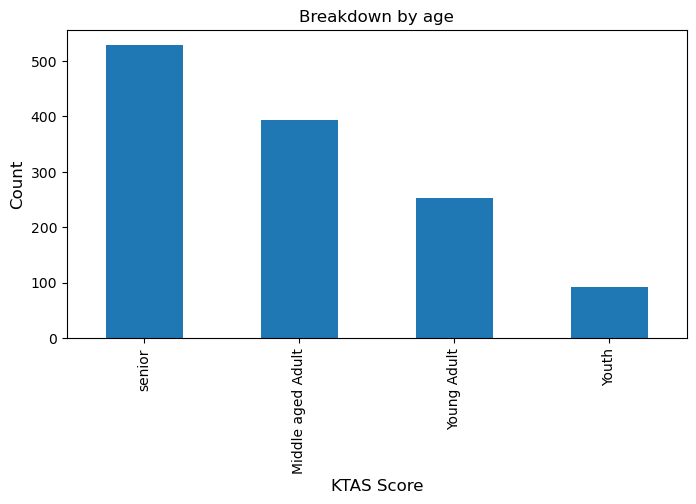

In [2075]:
#plotting the count of wach age range
df_raw['age_group'].value_counts().plot(kind='bar',figsize=[8,4])
plt.xlabel('KTAS Score', size=12)

plt.ylabel('Count', size=12)
plt.title('Breakdown by age')

The most common age group is seniors (above 60) and then follwed by Middle ages adult (between 40-60)

## 4. EDA between different variables

### a) Pain vs KTAS score

<AxesSubplot: title={'center': 'Pain status by KTAS score'}, xlabel='KTAS_expert,Pain', ylabel='Count'>

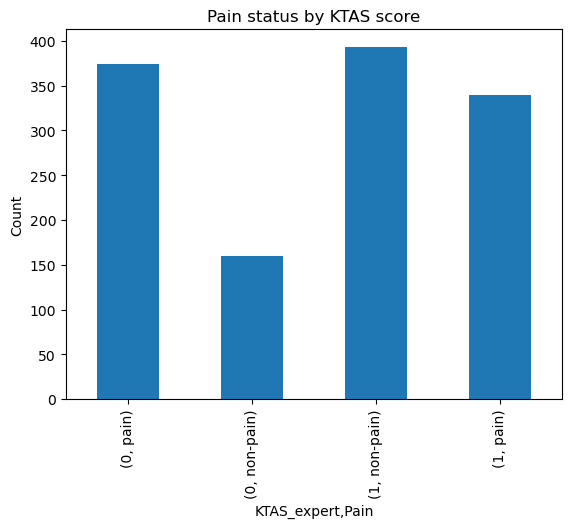

In [2076]:
df_raw.groupby('KTAS_expert')['Pain'].value_counts().plot(kind='bar',title='Pain status by KTAS score',ylabel='Count')

For emergency patients (1) the patients who report no pain are are higher than the ones who report pain. For non-emergency patients (0) , reporting pain is more common

### b) Mental State vs KTAS score

<AxesSubplot: ylabel='KTAS_expert'>

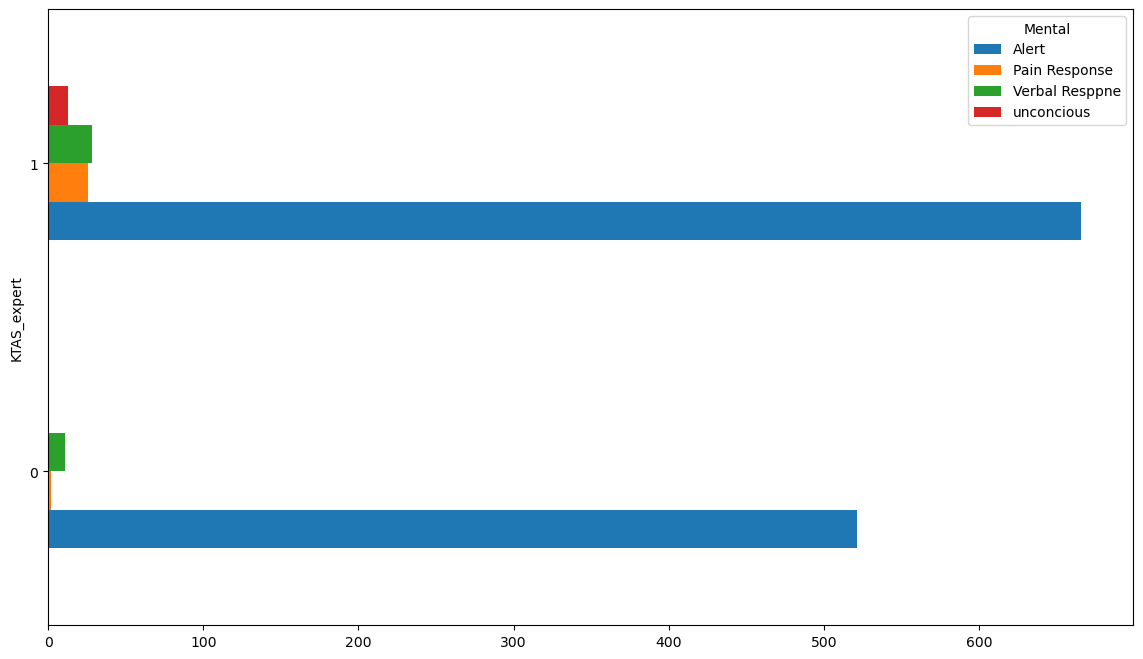

In [2077]:
#group by KTAS and then count mental state
df_raw.groupby('KTAS_expert')['Mental'].value_counts().unstack(level=-1).plot(kind = 'barh', rot = 0, figsize=[14,8],ylabel='Count')

Almost all non-emergency patients (0) are alert. Emergency patients are also mostly alert but a portion of them are unconcious/only providing verbal response etc

### c) Injury vs KTAS score

<AxesSubplot: xlabel='Injury', ylabel='Count'>

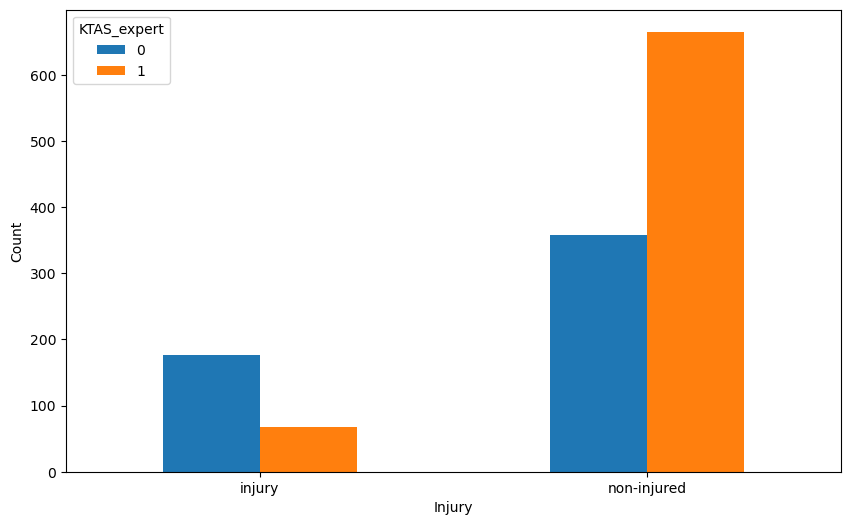

In [2078]:
#group by injury and then KTAS score
df_raw.groupby('Injury')['KTAS_expert'].value_counts().unstack(level=-1).plot(kind = 'bar', rot = 0, figsize=[10,6],ylabel='Count')

For injured patients, more of them are non emergency (0) and for non-injured patients the majority of them are emergency patients (1)

<AxesSubplot: title={'center': 'Average number of patients in ER when patient Traiged'}, xlabel='KTAS Score', ylabel='Average number of patients in ER'>

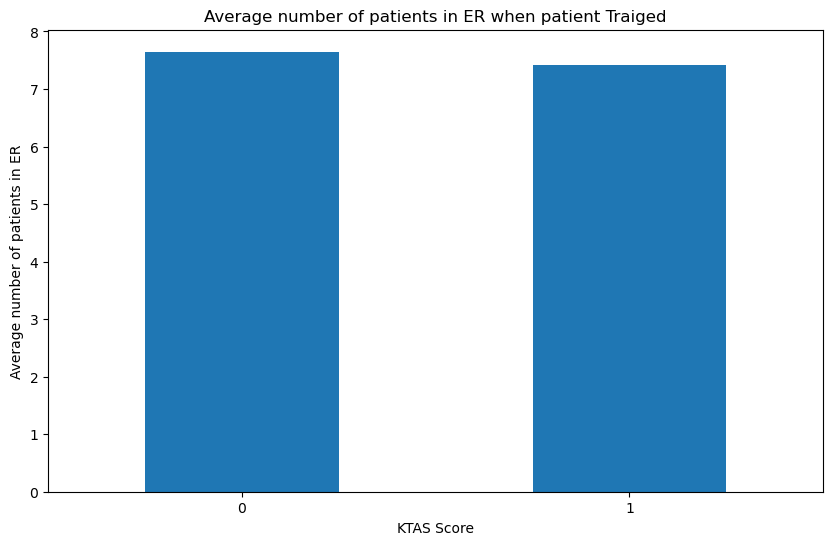

In [2079]:
df_raw.groupby('KTAS_expert')['Patients number per hour'].mean().plot(kind = 'bar', rot = 0, figsize=[10,6],title='Average number of patients in ER when patient Traiged',ylabel='Average number of patients in ER',xlabel='KTAS Score')


<AxesSubplot: xlabel='KTAS_expert'>

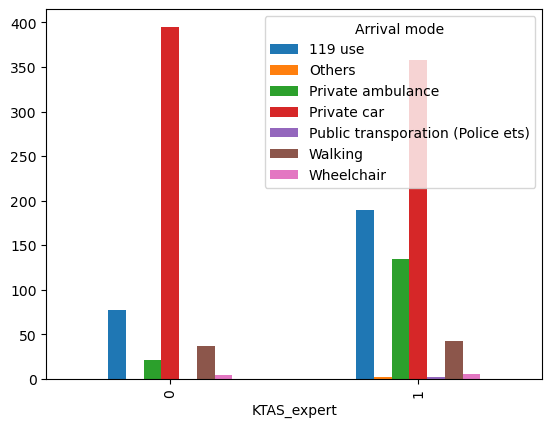

In [2080]:
#group by KTAS and then count arrival mode
df_raw.groupby('KTAS_expert')['Arrival mode'].value_counts().unstack(level=-1).plot(kind = 'bar')

The number of patients who come in via ambulance or emergency vehicles are mostly emergency patients while non emergency patients mostly come in via private vehicles

<AxesSubplot: ylabel='Emergency'>

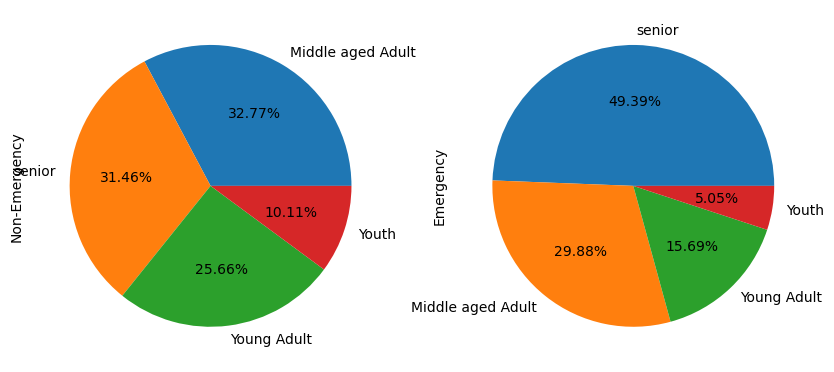

In [2081]:
#Plotting the age group vs KTAS score breakdown
plt.subplots(1, 2, figsize=(10,10) )
plt.subplot(1, 2, 1) 

emergency_data=df_raw.loc[df_raw['KTAS_expert']==0]
emergency_data['age_group'].value_counts().plot(kind = 'pie', label='Non-Emergency',autopct='%0.2f%%')



plt.subplot(1, 2, 2) 
emergency_data=df_raw.loc[df_raw['KTAS_expert']==1]
emergency_data['age_group'].value_counts().plot(kind = 'pie', label='Emergency',autopct='%0.2f%%')

For emergency patients almost 50% are seniors and 30% are middle aged whereas for non emergency only 31% are senior and most of the non emergency patients are young adults and middle aged

<AxesSubplot: xlabel='KTAS_expert'>

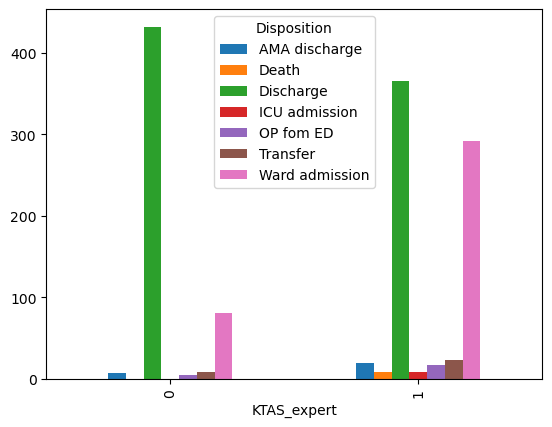

In [2082]:
df_raw.groupby('KTAS_expert')['Disposition'].value_counts().unstack(level=-1).plot(kind = 'bar')

Admission is more likely in emergency patients and discharge is more common in non emergency patients

## 5. Text Column EDA

The Chief Complaints column is a text based column containing brief information on the reason of the patients visit. We will explore this column to see if we can gather any insights

We will use word cloud to see the most common words and use bag of words and a classification model to see the words that are most predictive of emergency

In [2083]:
#importing wordcloud library
from wordcloud import WordCloud

In [2084]:
#creating word cloud
word_cloud2 = WordCloud(collocations = False, background_color = 'white',max_words=80).generate(str(df_raw['Chief_complain'].values))

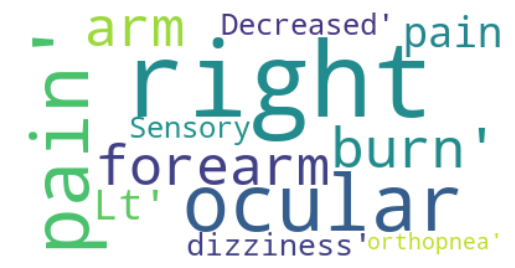

In [2085]:
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

Words such as pain ,right, ocular are most common. This gives us an insight into the most common reasons a person comes to the ER

We will now use a count vectorizer to find the most common words

In [2086]:
#import library
from sklearn.feature_extraction.text import CountVectorizer
# 1. Instantiate
bagofwords = CountVectorizer(min_df=10,stop_words="english", max_features=500)

# 2. Fit
bagofwords.fit(df_raw['Chief_complain'])

# 3. Transform
CF= bagofwords.transform(df_raw['Chief_complain'])
CF

<1267x48 sparse matrix of type '<class 'numpy.int64'>'
	with 1744 stored elements in Compressed Sparse Row format>

In [2087]:
#create a dataframe of our most common words
df_transformed = pd.DataFrame(columns=bagofwords.get_feature_names(), data=CF.toarray(), index= df_raw['Chief_complain'].index)

In [2088]:
#viewing our created column
df_transformed.head()

,abd,abdomen,abdominal,acute,ankle,ant,arm,bleeding,change,chest,...,right,rt,seizure,skin,swelling,syncope,vaginal,vomiting,weakness,wound
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will now fit a classification model to see which words are predictive of emergency cases

In [2089]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(df_transformed, df_raw['KTAS_expert'])

LogisticRegression()

In [2090]:
#Pulling the highest coeefficients from the model
coefficients_df=pd.DataFrame({"Feature":df_transformed.columns.tolist(),"Coefficients":logreg.coef_[0]}).sort_values("Coefficients", ascending=False)
coefficients_df.set_index('Coefficients')
coefficients_df.head(3)

,Feature,Coefficients
14,dyspnea,2.649915
12,dizziness,2.256569
9,chest,2.161104


<AxesSubplot: title={'center': 'Words Predictive of Emergency'}, xlabel='Feature'>

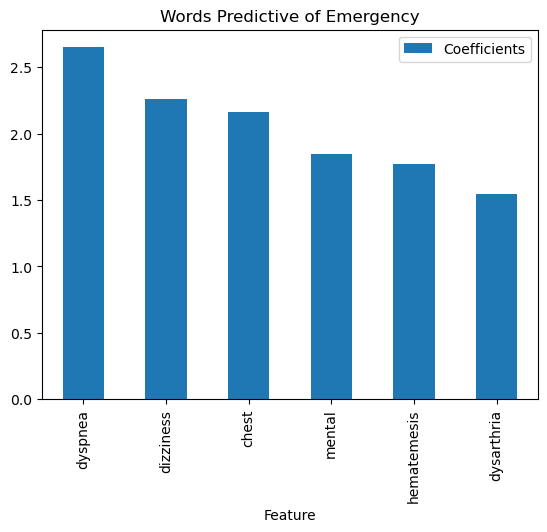

In [2091]:
#plotting the top 6 features with highest coefficients
coefficients_df.head(6).plot(kind='bar',x='Feature', title='Words Predictive of Emergency')

In [2092]:
coefficients_df.tail(6)

,Feature,Coefficients
24,injury,-1.047866
37,rash,-1.070241
4,ankle,-1.298183
27,leg,-1.388620
42,swelling,-1.475425
25,laceration,-2.277068


Words such as Dyspnea (shortness of breath) and dizziness are most indicitive of emergency as these complaints are usually symptoms of life threatning conditions such as heart disease or brain trauma

<AxesSubplot: title={'center': 'Words Predictive of Non-Emergency'}, xlabel='Feature'>

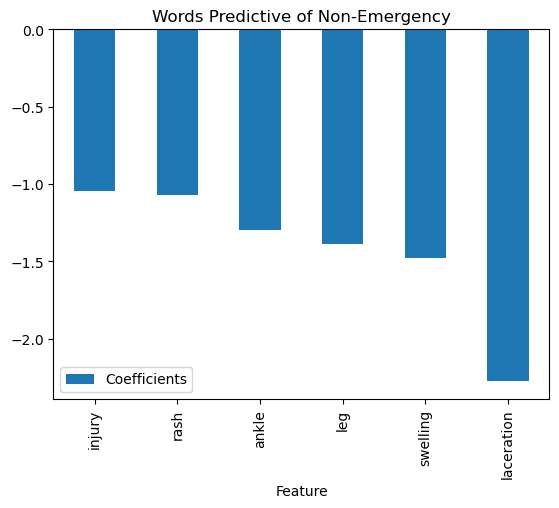

In [2093]:
#plotting the top 6 features with lowest coefficients
coefficients_df.tail(6).plot(kind='bar',x='Feature',title='Words Predictive of Non-Emergency')

Words such as swelling ,rash, laceration indicate non emergency cases as these cases can usually be treated and the patient discharged. these patients do not present with life threathening symptoms

### Lessons from EDA


Emergency patients usually come in alert and present with no pain and no injuries but critical symptoms therefore it is critical to correctly classify them as they dont present with visibly emergency symptoms. About 40% of the people who come to the ER are non-emergency so it is critical to identify them as non-emergency and discharge them so the resources are allocated to the emergency patients 




## 6. Feature Selection and Transformation

Now that we have explored our dataset, we will take a look at our independent variables more closesly and conduct feature selection. We need to determine if all of our independent variables are suitable to be used in our model. If some columns are correlated with each other or if they have low variance they could hinder the model, therefore we will eliminate them

### a) Dropping irrelevant columns

There are some columns that are not relavent to our project objective such as diagnosis and disposition as they are determined after the patient is seen by a doctor whereas our model is focused on triaging patients before a doctor sees them. Therefore these columns not pertinent to our objective will be dropped

In [2094]:
#dropping irrelavent columns
df_raw.drop(['KTAS_RN','Error_group','KTAS duration_min','mistriage','Diagnosis in ED','Disposition','age_group','Length of stay_min'], axis=1, inplace=True)

### b) Creating dummy variables
We will be converting the categorical columns to dummy variables so we have numeric inputs to our model instead of categorical

In [2095]:
#Converting categorical columns to dummies
df_raw=pd.get_dummies(df_raw, columns=['Group','Arrival mode', 'Mental','Injury','Sex','Pain'])

In [2096]:
#Checking the transformed dataset
df_raw.head(3)

,Age,Patients number per hour,Chief_complain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,...,Mental_Alert,Mental_Pain Response,Mental_Verbal Resppne,Mental_unconcious,Injury_injury,Injury_non-injured,Sex_Female,Sex_Male,Pain_non-pain,Pain_pain
0,71,3,right ocular pain,2.0,160.0,100.0,84.0,18.0,36.6,100.000000,...,1,0,0,0,1,0,0,1,0,1
1,56,12,right forearm burn,2.0,137.0,75.0,60.0,20.0,36.5,97.024561,...,1,0,0,0,1,0,1,0,0,1
2,68,8,"arm pain, Lt",2.0,130.0,80.0,102.0,20.0,36.6,98.000000,...,1,0,0,0,1,0,1,0,0,1


Since we converted our dataset into dummy variables we need to drop a reference column for each category so we dont have colliniearity between the variables

In [2097]:
#dropping reference column
df_raw.drop(['Arrival mode_Others','Group_Regional ED','Mental_unconcious','Pain_pain','Sex_Male','Injury_injury'], axis=1, inplace=True)

### c) Correlation analysis
We will now run a correlation analysis to determine which independent variables have a strong correlation and which variables are correlated to our dependent variable

<Figure size 640x480 with 0 Axes>

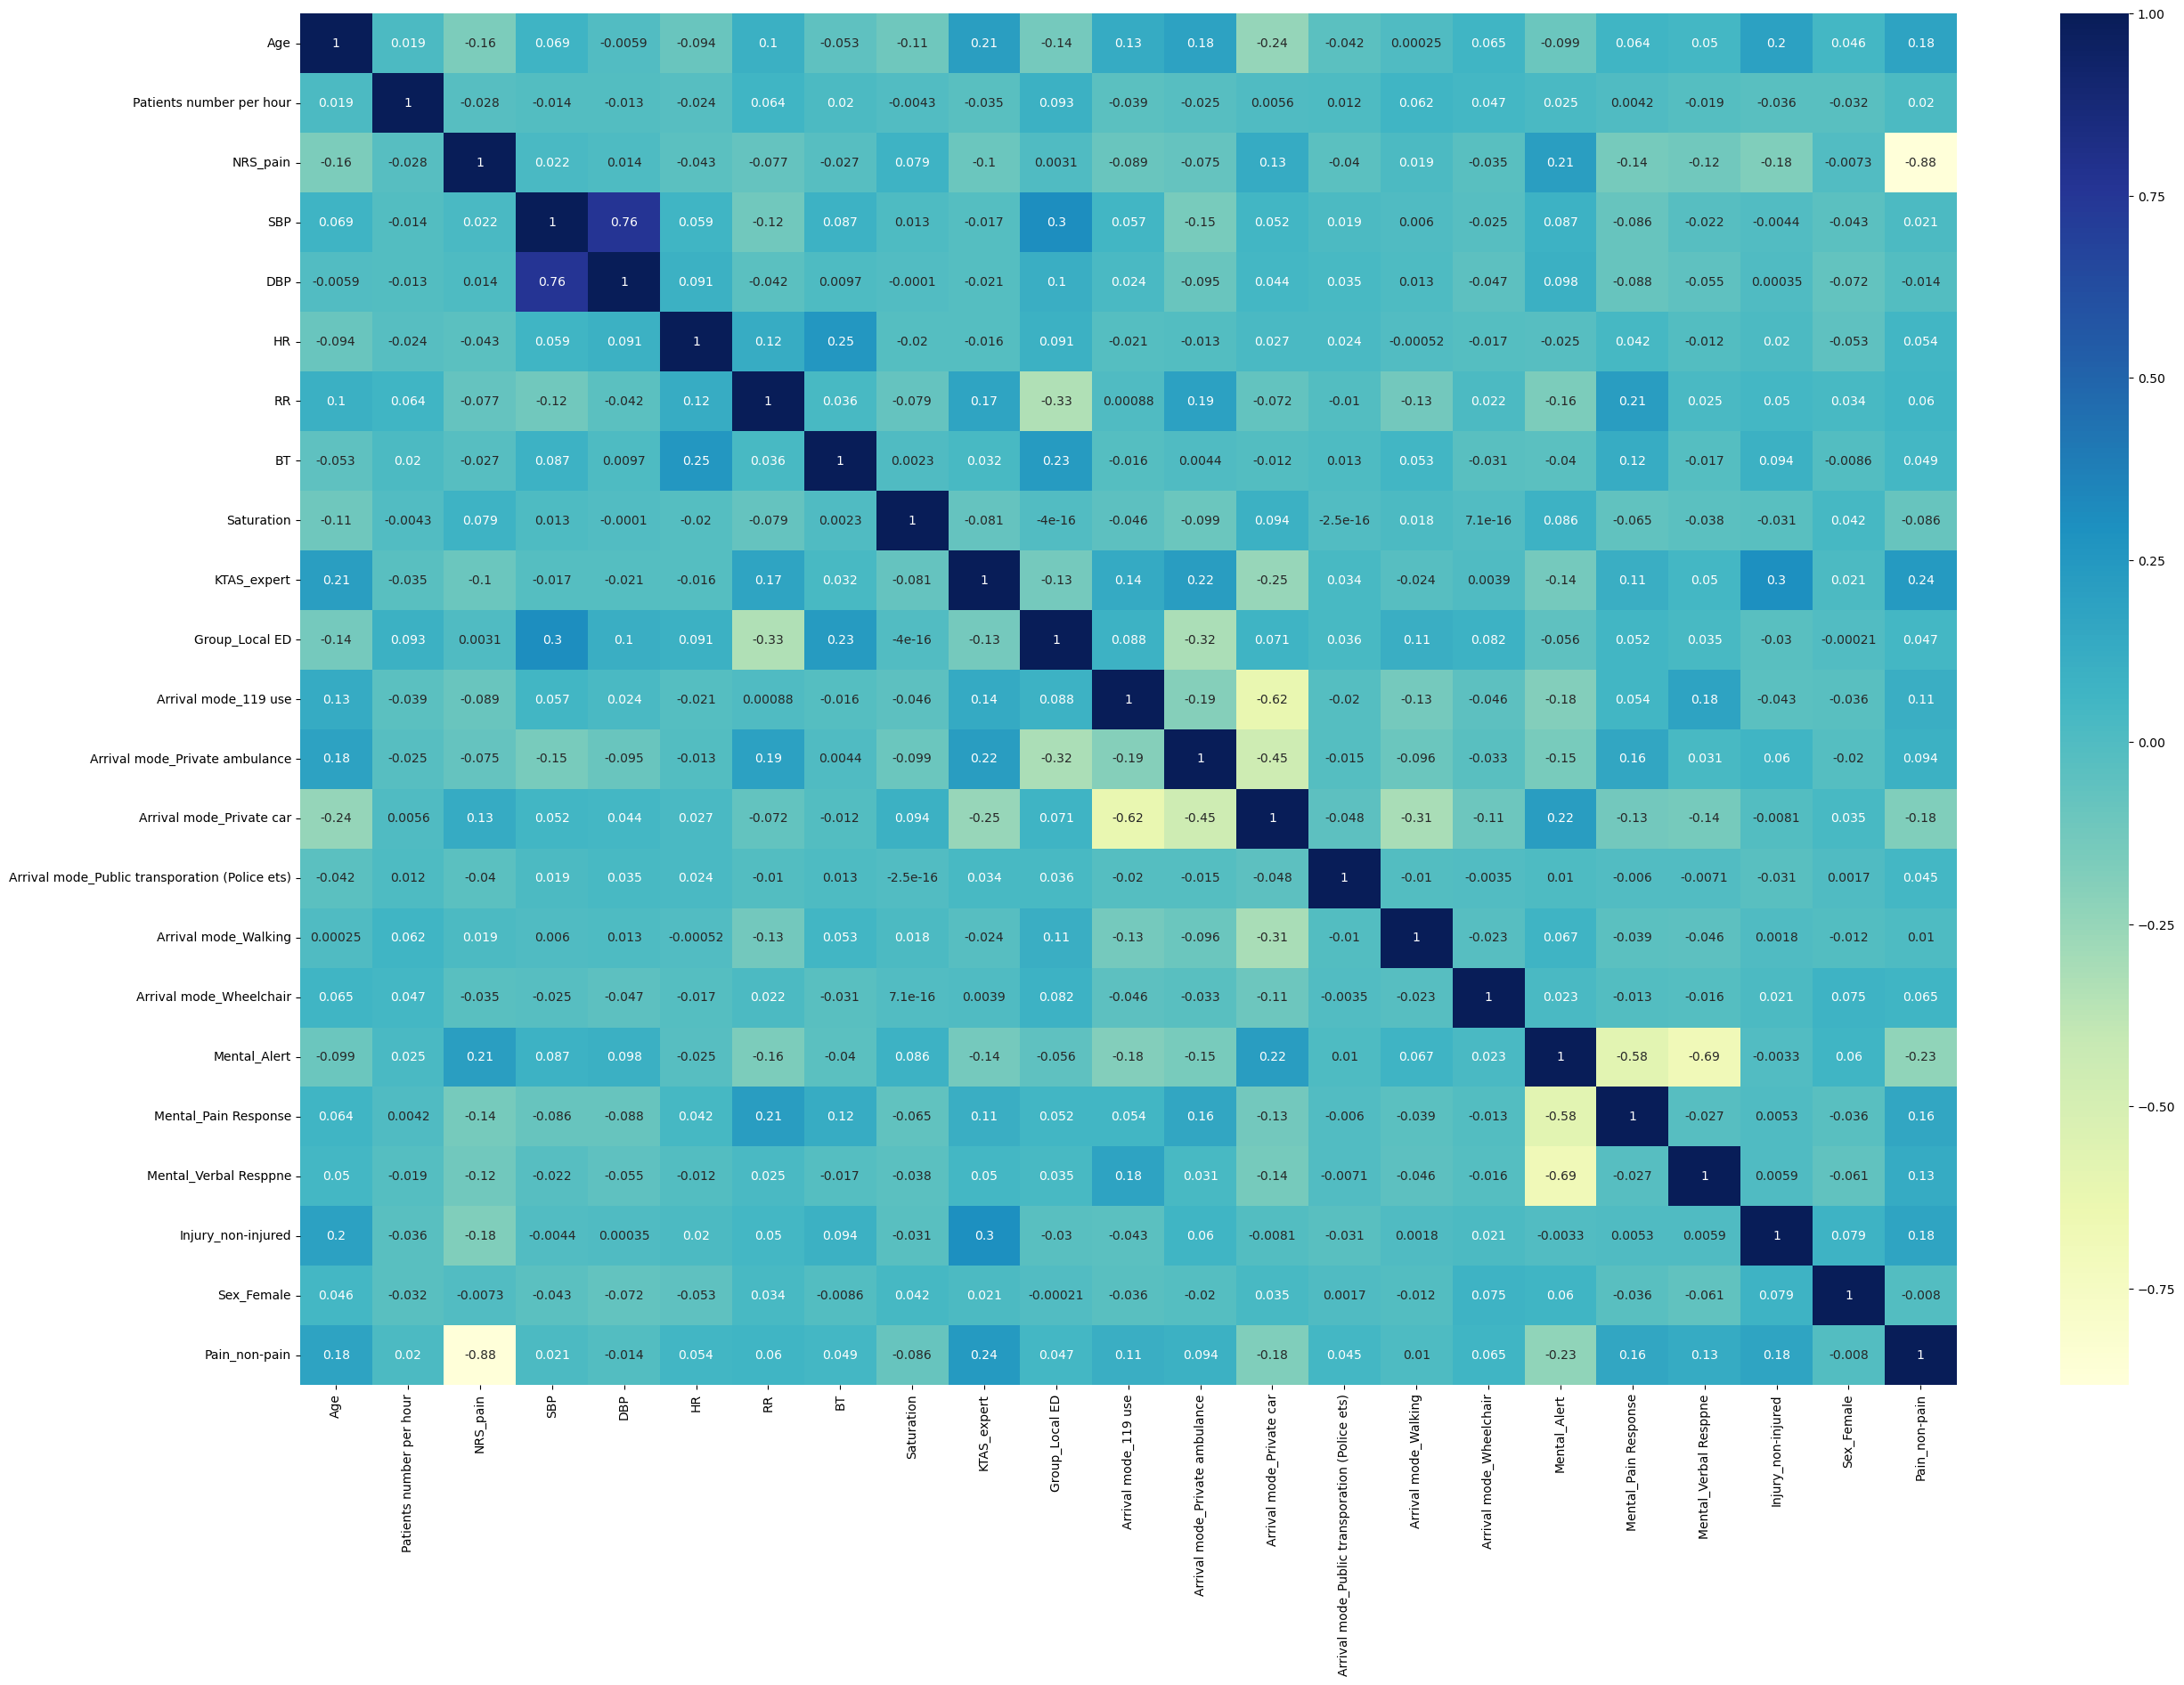

In [2098]:
#running a correlation matric
plt.figure()
# Visualize with seaborn
plt.figure(figsize=(30, 20))
sns.heatmap(df_raw.corr(), cmap="YlGnBu", annot=True)
plt.show()

- Age, Arrival_Mode_car and Pain are the most correlated with the dependent variable KTAS expert.
- NRS Pain and Pain_non pain columns are correlated so one of them will be dropped
- SBP and DBP are correlated so one of them will be dropped


In [2099]:
#dropping correlated independent variables
df_raw.drop(['Pain_non-pain','SBP'], axis=1, inplace=True)

In [2100]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age                                             1267 non-null   int64  
 1   Patients number per hour                        1267 non-null   int64  
 2   Chief_complain                                  1267 non-null   object 
 3   NRS_pain                                        1267 non-null   float64
 4   DBP                                             1267 non-null   float64
 5   HR                                              1267 non-null   float64
 6   RR                                              1267 non-null   float64
 7   BT                                              1267 non-null   float64
 8   Saturation                                      1267 non-null   float64
 9   KTAS_expert                              

### d) Checking variance KBest feature selection
We will now check the variance of the numeric columns and conduct Select KBest to select the features most predictive of the dependent variable

In [2101]:
#retrieving numeric columns 
df_numeric=df_raw[['Age','Patients number per hour','NRS_pain','DBP','HR','RR','BT','Saturation']]

In [2102]:
#retrieving categoric columns
df_categorical=df_raw.drop(['Age','Patients number per hour','NRS_pain','DBP','HR','RR','BT','Saturation','KTAS_expert','Chief_complain'],axis=1)

In [2103]:
# We will now scale the data and check its variance 

# scaling the data
from sklearn.preprocessing import MinMaxScaler

my_mm = MinMaxScaler()
# Transforming the data
scaled_data = my_mm.fit_transform(df_numeric)

df_numeric_scaled = pd.DataFrame(data=scaled_data, columns=df_numeric.columns)

We will now calculate the variance and plot a graph of the variances and use a threshold of 0.0005 

In [2104]:
from sklearn.feature_selection import VarianceThreshold

# Initiating the VarianceThresholder and setting threshold
my_vt = VarianceThreshold(threshold=0.001)

# Fit to the data and calculate the variances per column
my_vt.fit(df_numeric_scaled)

VarianceThreshold(threshold=0.001)

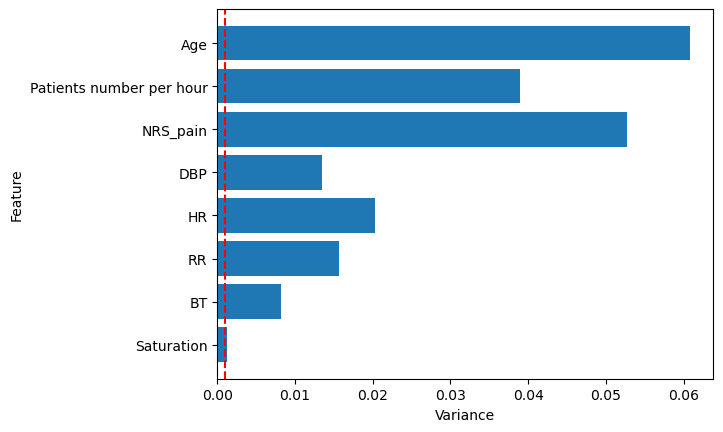

In [2105]:
# Extract the variances per column
column_variances = my_vt.variances_

# Plot with the threshold
plt.figure()
plt.barh(np.flip(df_numeric_scaled.columns), np.flip(column_variances))
plt.xlabel('Variance')
plt.ylabel('Feature')
plt.axvline(0.001, color='red', linestyle='--')
plt.show()

In [2106]:
#conducting Kbest selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Pull out features and target
X = df_numeric_scaled
y = df_raw['KTAS_expert']

# Instantiate KBest feature selector and fit
my_KBest = SelectKBest(f_classif, k=3).fit(X, y)

<AxesSubplot: title={'center': 'Numeric Columns Kbest'}>

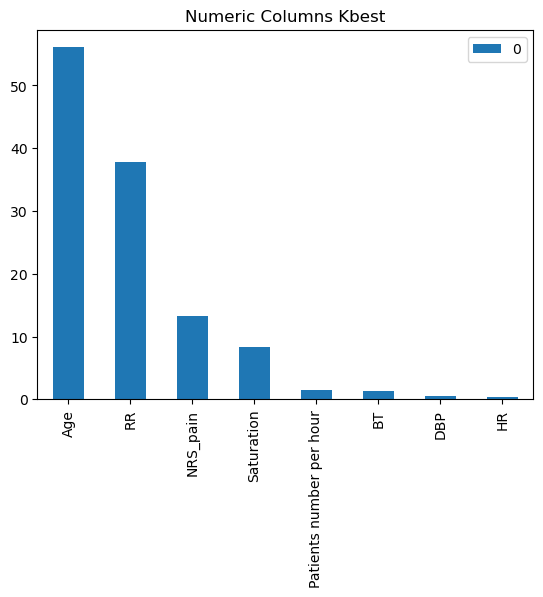

In [2107]:
#We will now put out Kbest scores into a dataframe and plot a graph of the scores
df2 = pd.DataFrame(my_KBest.scores_.reshape(-1, len(my_KBest.scores_)),columns=df_numeric_scaled.columns).transpose()
df2.sort_values(by=0, ascending=False).plot(kind='bar', title='Numeric Columns Kbest')

Age, RR, Patients number per hour, NRS_pain, Saturation will be selected as the numerical variables as they show the most predictive capabilities

In [2108]:
#conducting K best selection on categorical columns
from sklearn.feature_selection import chi2

# Pull out features and target
X = df_categorical
y = df_raw['KTAS_expert']

# Instantiate KBest feature selector and fit
my_KBest_cat = SelectKBest(chi2, k=2).fit(X, y)

<AxesSubplot: title={'center': 'Categorical Columns Kbest'}>

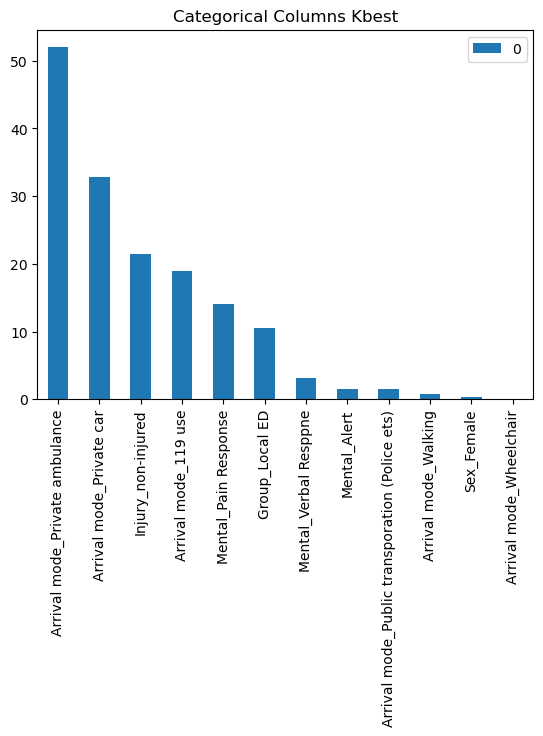

In [2109]:
#We will now put out Kbest scores into a dataframe and plot a graph of the scores
df = pd.DataFrame(my_KBest_cat.scores_.reshape(-1, len(my_KBest_cat.scores_)),columns=df_categorical.columns).transpose()
df.sort_values(by=0, ascending=False).plot(kind='bar', title='Categorical Columns Kbest')

The first 6 variables will be chosen to be used to train our model since they have high K best scores

In [2110]:
## Finalizing our features
X_final=df_raw[['Age','Patients number per hour','NRS_pain','RR','Saturation','Chief_complain','Arrival mode_Private ambulance','Arrival mode_Private car','Injury_non-injured','Arrival mode_119 use','Mental_Pain Response']]
y_final=df_raw[['KTAS_expert']]

### e) Transforming Text column and splitting dataset into Test/Train

We will now split the dataset into train and test and convert the text column of both the test data and train data into a numeric column

In [2111]:
#Splitting our dataset into test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.2, random_state=42)

In [2112]:
# we will now vectorize the text column of the train dataset
#import library
from sklearn.feature_extraction.text import CountVectorizer
# 1. Instantiate
bagofwordstrain = CountVectorizer(max_features=12)

# 2. Fit
bagofwordstrain.fit(X_train['Chief_complain'])

# 3. Transform
CF_train= bagofwordstrain.transform(X_train['Chief_complain'])



In [2113]:
# we will now vectorize the text column of the test dataset
bagofwordstest = CountVectorizer(max_features=12)

# 2. Fit
bagofwordstest.fit(X_test['Chief_complain'])

# 3. Transform
CF_test= bagofwordstest.transform(X_test['Chief_complain'])

We will now convert the resulting matrix of our vectorized columns to a dataframe so it can be merged back into our original dataset

In [2114]:
#converting training matrix to dataframe
df_complaints_train = pd.DataFrame(columns=bagofwordstrain.get_feature_names(), data=CF_train.toarray(), index= X_train['Chief_complain'].index)

In [2115]:
#converting testing matrix to dataframe
df_complaints_test = pd.DataFrame(columns=bagofwordstest.get_feature_names(), data=CF_test.toarray(), index= X_test['Chief_complain'].index)

In [2116]:
#isolating remaining columns 
X_remaining_train=X_train.drop(['Chief_complain'], axis=1)
X_remaining_test=X_test.drop(['Chief_complain'], axis=1)

In [2117]:
#combining transformed text columns 
df_transformed_train=pd.concat([X_remaining_train ,df_complaints_train], axis=1)
df_transformed_test=pd.concat([X_remaining_test ,df_complaints_test], axis=1)

We now have a fully transformed dataset. Categorical and text columns are all numeric. The numeric columns will be scaled when fiting the model

# 7. Baseline Model

We will run a baseline logistics regression model to get a baseline idea of how are data translates to modelling

In [2118]:
#running a logistic regression model
logreg = LogisticRegression()
logreg.fit(df_transformed_train, y_train)

# We will score the model against the train and test data
print(f"Train score: {logreg.score(df_transformed_train, y_train)}")
print(f"Test score: {logreg.score(df_transformed_test, y_test)}")

Train score: 0.6969397828232972
Test score: 0.7125984251968503


We will create a confusion matrix to see how many of the classes were predicted correclty

In [2119]:
#predicting using the test dataset
y_pred = logreg.predict(df_transformed_test)

In [2120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report



# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

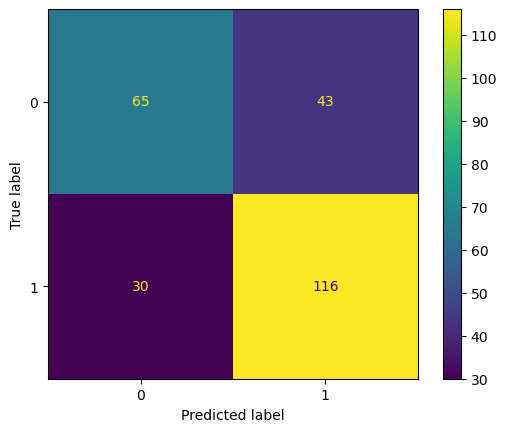

In [2121]:
ConfusionMatrixDisplay(cf_matrix).plot()

In [2122]:
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

0.7295597484276729

In [2123]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.7945205479452054

Our model gave an accuracy of 70% on the test score which indciates we are on the right track but this score can be improved with further data procesing such as hyperparameter optimization, boosting and scaling

# 8. Model Evaluation Framework

Our baseline model correctly classified 84% of the emergency patients and 60% of the non-emergency patients. The model will be evaluated on how well it correcly classifies emergency patients as emergency and non emergency patients as non emergency. The more important metric is the recall score as it is more critical that the model correctly classifies the emergency patients. T

# 9. Hyperparameter optimization + Scaling

In [2124]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')



We will now run different Machine Learning models and optimize the hyperparameters in order to find the best performing model

### a) Logistic Regression
 

In [2125]:
#creating a pipline to run the logistics model in order to run a grid search
estimators_log = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
]

my_pipe = Pipeline(estimators)

In [2126]:
#running a grid search to find the best hyperparameters
param_grid = [
    {
        'scaler': [StandardScaler(), None],
        'model': [LogisticRegression()], 
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['saga', 'lbfgs']
        
        
    }
    
]

grid = GridSearchCV(my_pipe, param_grid, cv=3)

fittedgrid = grid.fit(df_transformed_train, y_train)

In [2127]:
fittedgrid.best_params_

{'model': LogisticRegression(C=0.1, solver='saga'),
 'model__C': 0.1,
 'model__penalty': 'l2',
 'model__solver': 'saga',
 'scaler': StandardScaler()}

In [2128]:
#using the best hyper parameters
estimators2 = [
    ('scaler',StandardScaler()),
     ('model', LogisticRegression(C=0.1, penalty='l2',solver='saga'))
        
]

my_pipe2 = Pipeline(estimators2)

In [2129]:
my_pipe2.fit(df_transformed_train, y_train)

#Printing test score
print(f'Test score: {my_pipe2.score(df_transformed_test, y_test)}')
print(f'Test score: {my_pipe2.score(df_transformed_train, y_train)}')

Test score: 0.7283464566929134
Test score: 0.702862783810464


In [2130]:
#calculating recall
y_pred_log_opt = my_pipe2.predict(df_transformed_test)
recall_score(y_test, y_pred_log_opt)

0.7397260273972602

## b)Decision Tree

In [2131]:
#creating a pipline to run the decision tree model in order to run a grid search
estimators3 = [
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier())
]

my_pipe3 = Pipeline(estimators3)

In [2132]:
#running a grid search
param_grid = [
    {
        'scaler': [StandardScaler(), None],
        'model': [DecisionTreeClassifier()], 
        'model__max_depth': [2,4,6,8,10,12,14,16,20],
        'model__min_samples_leaf': [2,4,6,8,10,12,14,16,20]
        
    }
    
]

grid = GridSearchCV(my_pipe3, param_grid, cv=5)

fittedgrid2 = grid.fit(df_transformed_train, y_train)

In [2133]:
fittedgrid2.best_params_

{'model': DecisionTreeClassifier(max_depth=6, min_samples_leaf=14),
 'model__max_depth': 6,
 'model__min_samples_leaf': 14,
 'scaler': None}

In [2134]:
#using the best parameters
estimators4 = [
    ('scaler',StandardScaler()),
     ('model', DecisionTreeClassifier(max_depth=6,min_samples_leaf=14))
        
]

my_pipe4 = Pipeline(estimators4)

my_pipe4.fit(df_transformed_train, y_train)

#Printing test score
print(f'Test score: {my_pipe4.score(df_transformed_test, y_test)}')

Test score: 0.7480314960629921


In [2135]:
#predicting on test data
y_pred_Dec = my_pipe4.predict(df_transformed_test)

In [2136]:
#calculating recall
recall_score(y_test, y_pred_Dec)

0.8356164383561644

### c) KNN

In [2137]:
#creating a pipline to run the decision tree model in order to run a grid search
from sklearn.neighbors import KNeighborsClassifier
estimators5 = [
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
]

my_pipe5 = Pipeline(estimators5)

In [2138]:
#running grid search
param_grid = [
    {
        'scaler': [StandardScaler(), None],
        'model': [KNeighborsClassifier()], 
        'model__n_neighbors': [2,4,6,8,10,12,14,16,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50],
        
        
    }
    
]

grid = GridSearchCV(my_pipe5, param_grid, cv=5)

fittedgrid5 = grid.fit(df_transformed_train, y_train)

In [2139]:
fittedgrid5.best_params_

{'model': KNeighborsClassifier(n_neighbors=6),
 'model__n_neighbors': 6,
 'scaler': StandardScaler()}

In [2140]:
#using the best parameters
estimators6 = [
    ('scaler',StandardScaler()),
     ('model', KNeighborsClassifier(n_neighbors=30))
        
]

my_pipe6 = Pipeline(estimators6)

my_pipe6.fit(df_transformed_train, y_train)

#Printing test score
print(f'Test score: {my_pipe6.score(df_transformed_test, y_test)}')

Test score: 0.65748031496063


### e) Gradient boosting

In [2141]:
#scaling dataset
my_standard_scaler = StandardScaler()
my_standard_scaler.fit(df_transformed_train)
df_transformed_train = my_standard_scaler.transform(df_transformed_train)
df_transformed_test = my_standard_scaler.transform(df_transformed_test)

gbc = GradientBoostingClassifier()

#selecting range of parameters
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}
#gridsearching to find best parameters

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(df_transformed_train, y_train)

# best score
print(f"best score: {grid_search_gbc.best_score_}")

# best parameters 
print(f"best parameters: {grid_search_gbc.best_params_}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
best score: 0.7818075403599473
best parameters: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}


The gradient boosting classifier was the best performer, We will now  calculate the recall score to evaluate the performance of the model

In [2142]:
# tuned gbc model
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 100)
gbc.fit(df_transformed_train, y_train)
print(f'Test score: {grid_search_gbc.score(df_transformed_test, y_test)}')
y_pred2 = gbc.predict(df_transformed_test)
print(classification_report(y_test, y_pred2))

Test score: 0.7992125984251969
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       108
           1       0.79      0.89      0.84       146

    accuracy                           0.80       254
   macro avg       0.80      0.78      0.79       254
weighted avg       0.80      0.80      0.80       254



**Model Interpretation and Evaluation** 

The gradient boosting model was the best performing model out of all the ones tested outputting an accuracy of 80% on the test data and a recall of 89% for the positive class. This is a good score for the tool we are building as it is more important that our model classifies an emergency patient correctly. The model is less accurate at predicting the non emergency class as our recall score for the non emergency was 68% . This can likely be improved by training our model with additional data. Altough a good recall score for positive class is a priority in our model it is still important that the non emergency patients are classified correctly so they can be referred to clinics/specialists and the ER resources can be focused on critically ill patients. Overall the patients chief complain is the most predictive of classification. After inputting new data into our model using widgets below, a combination of certain complaints and other vitals are indcitive of emergency patients such as chest pain and no injury and a row respiratory rate. 

# 10. Predicting on new data

We will now build a webapp to display our model using python widgets and run it using html. Bur first we need to create a function that takes in inputs of our independent variables and transforms it to a format that can be fed into our model. The function will then return our prediction

In [2143]:
#creating function that takes patients, details sunch as vitals and symptoms as input
def make_prediction(age, No_Patients_in_ER, RR, Saturation, NRS_pain, mode_of_transport, Chief_complain,injury, Mental_state):
    
    
 #converting the inputs to a dataframe so we can do our transformations   
    df_new = pd.DataFrame({"Age":age,"RR":RR,"Saturation":Saturation,'Patients number per hour':No_Patients_in_ER,'NRS_pain':NRS_pain,'Arrival mode_Private ambulance':mode_of_transport, 'Injury_non-injured':injury,'Chief_complain':Chief_complain,'Mental_Pain Response':Mental_state},index=[0])
    df_new["Arrival mode_Private car"] = " "
    df_new["Arrival mode_119 use"] = " "
    
    
   #splitting the dataframe into categoric, numeric and text so we transform them to match the dataset we fed to the model
    df_new_numeric = df_new[["Age", "Patients number per hour","RR","Saturation","NRS_pain"]]
   
    df_new_categoric=df_new[['Arrival mode_Private ambulance','Arrival mode_119 use','Arrival mode_Private car','Injury_non-injured','Mental_Pain Response']]
    
    
    df_new_text=df_new['Chief_complain']
    
    #Transforming the complain column to countvectorizer array
    CF4= bagofwordstrain.transform(df_new['Chief_complain'])
    
    df_new_comp = pd.DataFrame(columns=bagofwordstrain.get_feature_names(), data=CF4.toarray(), index= df_new.index)
    
    df_new=pd.concat([df_new_numeric ,df_new_categoric,df_new_comp], axis=1)
     #creating if/else statements to convert the categorical columns to the dummy variable format of the training dataset
  
    if injury == 'no':
        df_new["Injury_non-injured"] = df_new["Injury_non-injured"].replace(['no'], 1)
    elif injury == 'yes':
        df_new["Injury_non-injured"] = df_new["Injury_non-injured"].replace(['yes'], 0)
    else:
        pass
        
    if Mental_state == 'pain_response':
        df_new["Mental_Pain Response"] = df_new["Mental_Pain Response"].replace(['pain_response'], 1)
    elif Mental_state == 'Normal':
        df_new["Mental_Pain Response"] = df_new["Mental_Pain Response"].replace(['Normal'], 0)
    else:
        pass
    
    
    

    
    
    if mode_of_transport == 'Private ambulance':
        df_new["Arrival mode_Private ambulance"] = df_new["Arrival mode_Private ambulance"].replace(['Private ambulance'], 1)
        df_new["Arrival mode_Private car"] = df_new["Arrival mode_Private car"].replace([" "], 0)
        df_new["Arrival mode_119 use"] = df_new["Arrival mode_119 use"].replace([" "], 0)
    
    elif mode_of_transport == 'car':
        df_new["Arrival mode_Private ambulance"] = df_new["Arrival mode_Private ambulance"].replace(['car'], 0)
        df_new["Arrival mode_Private car"] = df_new["Arrival mode_Private car"].replace([" "], 1)
        df_new["Arrival mode_119 use"] = df_new["Arrival mode_119 use"].replace([" "], 0)
        
    elif mode_of_transport == '119_use':
        df_new["Arrival mode_Private ambulance"] = df_new["Arrival mode_Private ambulance"].replace(['119_use'], 0)
        df_new["Arrival mode_Private car"] = df_new["Arrival mode_Private car"].replace([" "], 0)
        df_new["Arrival mode_119 use"] = df_new["Arrival mode_119 use"].replace([" "], 1)
    
    else:
        pass   
    
    #matching the order of the training set
    final =df_new[['Age', 'Patients number per hour', 'NRS_pain','RR', 'Saturation', 'Arrival mode_Private ambulance','Arrival mode_Private car','Injury_non-injured','Arrival mode_119 use','Mental_Pain Response','abd','ant','chest','dizziness','dyspnea','fever','headache','injury','lt','pain','rt','weakness']]
    
    #scaling the dataset 
    df_transformed_unseen = scaler.transform(final)
    #predicting the classification
    prediction = gbc.predict(df_transformed_unseen)
    
    
    #printing emergency/non emergency 
    
    if prediction[0]==1:
        print('\033[91m THIS PATIENT IS EMERGENCY!!!')
    else:
        print('\033[92m THIS PATIENT IS NON-EMERGENCY')
    
 

        
   
    
   

   
    
    
    
   
    


In [2144]:
#lets run our function with new inputs 
make_prediction(41,5,20.0,98.00,3.0,'car','chest pain','yes','Normal')

 THIS PATIENT IS NON-EMERGENCY


Our function is working we will now use an interactive widget to build a user  friendly triage system that outputs the classification of the incoming ER patient

In [2145]:
import ipywidgets as widgets 
from ipywidgets import Button, Layout
from ipywidgets.embed import embed_minimal_html

In [2148]:
warnings.filterwarnings('ignore')
#building the widget 
print('                                 SMART TRIAGE TOOL')
b = Button(description='Styled button', style=dict(
    font_style='italic',
    font_weight='bold',
    font_variant="small-caps",
    text_color='red',
    text_decoration='underline'
))
style = {'description_width': 'initial'}
c=widgets.interact( 
                make_prediction, age=widgets.BoundedIntText(min=0, max=90,step=1, description='Age:',disabled=False,layout=b.layout),
    
                No_Patients_in_ER = widgets.BoundedIntText(min=0, max=20,step=1, description='Number of patients in ER:',style=style,disabled=False,layout=b.layout),
                RR=widgets.BoundedIntText(min=0, max=50,step=1, description='Respiratory Rate:',style=style,disabled=False,layout=b.layout),
                Saturation=widgets.BoundedIntText(min=50, max=110,step=1, description='Saturation:',style=style,disabled=False,layout=b.layout),
                NRS_pain=widgets.BoundedIntText(min=0, max=10,step=1, description='NRS_pain scale:',style=style,disabled=False,) ,
                mode_of_transport= widgets.Dropdown(options=['car', '119_use', 'Private ambulance'],description='mode_of_transport',style=style,disabled=False),
                
                Chief_complain= widgets.Text(description='Chief_complain',style=style,disabled=False,layout=b.layout),
                injury=widgets.Dropdown(options=['yes', 'no'],description='Injury',style=style,disabled=False),
                Mental_state=widgets.Dropdown(options=['pain_response', 'Normal'],description='Mental_state',style=style,disabled=False),
                
                
                
            );


                                 SMART TRIAGE TOOL


interactive(children=(BoundedIntText(value=0, description='Age:', max=90), BoundedIntText(value=0, description…

.